# Data Visualization with Haberman Dataset

 1. We can get the data from * [kaggle](https://www.kaggle.com/gilsousa/habermans-survival-data-set)*.

 I have taken *[this](https://www.kaggle.com/benhamner/python-data-visualizations)* for the documentation style.

 * Title: Haberman's Survival Data


 * The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Dejavu Sans'

# read the csv file into one pandas Dataframe..
hbman = pd.read_csv('haberman.csv')

# let's see a sample of haberman dataset 
hbman.head()

,age,year,axillary,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1



## Attribute information

1. ***age***     : Age of patient at time of operation. 
2. ***year***    : Patient's year of operation (year-65 means year-1965).
3. ***axillay*** : Number of positive axillary nodes detected.
4. ***survived***: It is a label. 
           '1' means 'the patient survived more than 5 years'. We can consider this as +ve label.
           '2' means 'the patient died within 5 years'. We can consider this as -ve label.
                    

In [3]:
# let's change the label values to something more readable(Non-Numeric)
#     1 as +ve ie., survived more than 5 years.
#     2 as -ve ie., died within 5 years..
label_map={1:'survived more than 5 years', 2:'died in less 5 years'}
hbman['survived'] = hbman['survived'].map(label_map)
print(hbman.columns.map(type))
hbman.head()

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>], dtype='object')


,age,year,axillary,survived
0,30,64,1,survived more than 5 years
1,30,62,3,survived more than 5 years
2,30,65,0,survived more than 5 years
3,31,59,2,survived more than 5 years
4,31,65,4,survived more than 5 years


In [4]:
# data-points and features
print(hbman.shape)
# headers
print(hbman.columns)

(306, 4)
Index(['age', 'year', 'axillary', 'survived'], dtype='object')


In [5]:
# let's observe the survival rate of 306 patients.
hbman['survived'].value_counts()

survived more than 5 years    225
died in less 5 years           81
Name: survived, dtype: int64

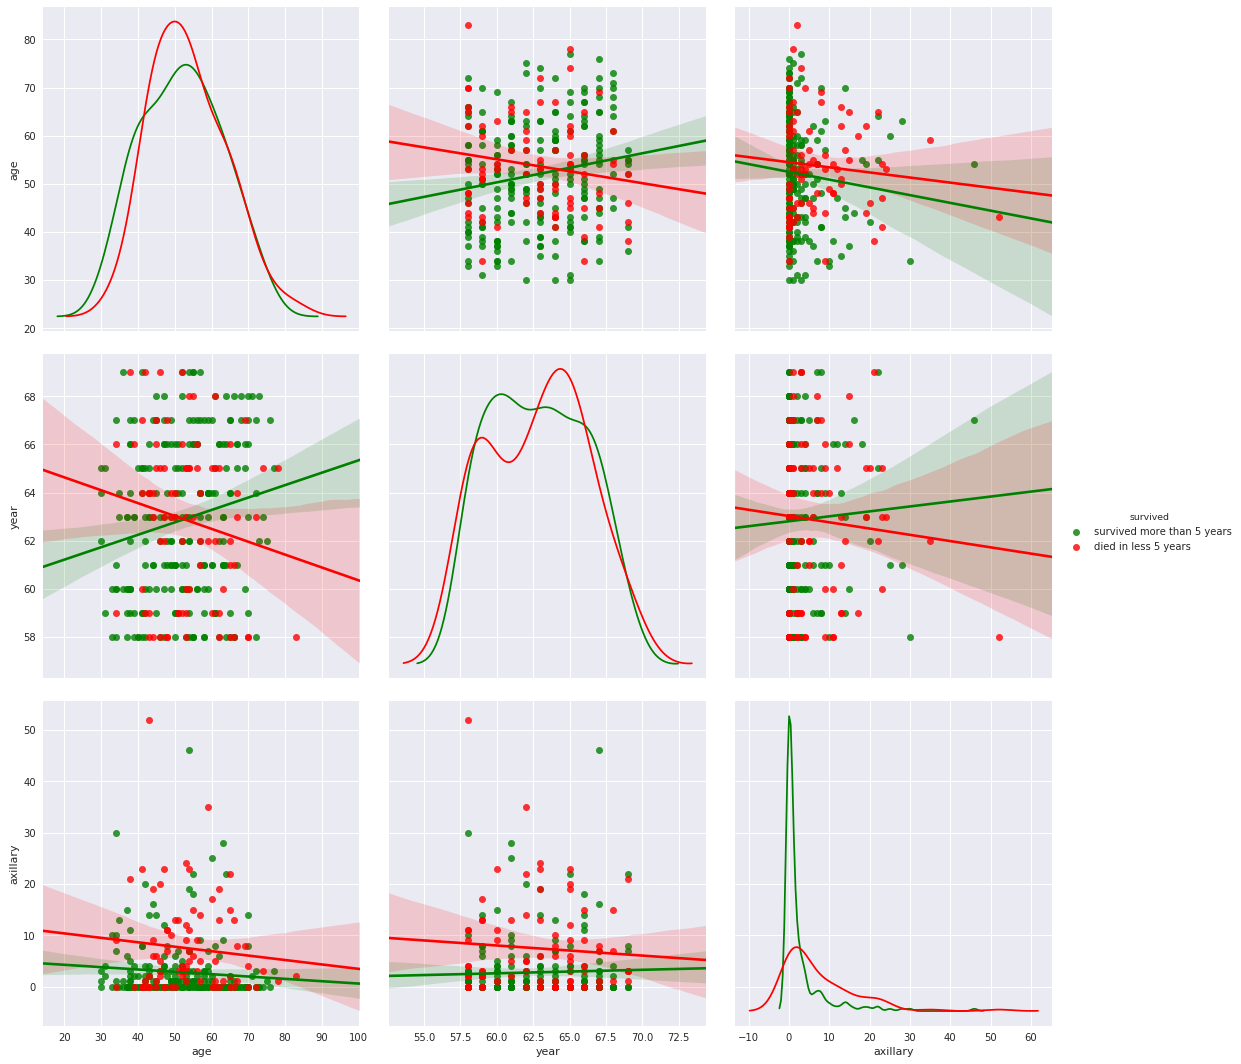

In [6]:
# let's try pairwise scatterplot

plt.close()
sns.pairplot(hbman, hue="survived", size=5, kind='reg', diag_kind="kde", palette=['g', 'r'])
plt.show()


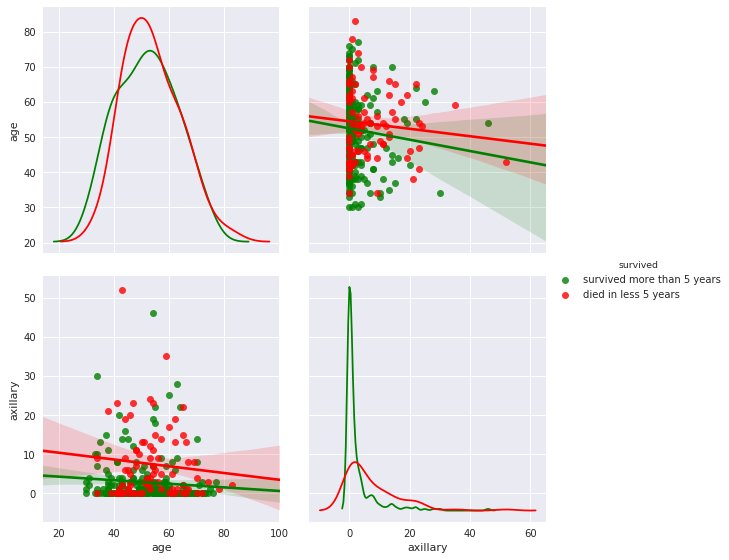

In [7]:
plt.close()
sns.pairplot(hbman, hue="survived",vars=['age', 'axillary'], kind='reg', size=4, diag_kind="kde", palette=['g', 'r'])
plt.show()

#  1D - KDE plot of axillary feature

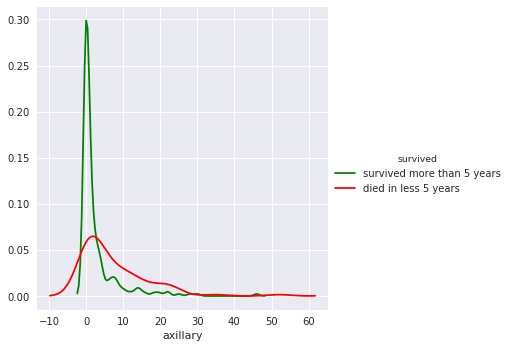

In [12]:
# kde plot for axillary nodes
sns.FacetGrid(data=hbman, hue='survived', size=5, palette=['g','r'])  \
            .map(sns.kdeplot,'axillary') \
            .add_legend();
plt.show()

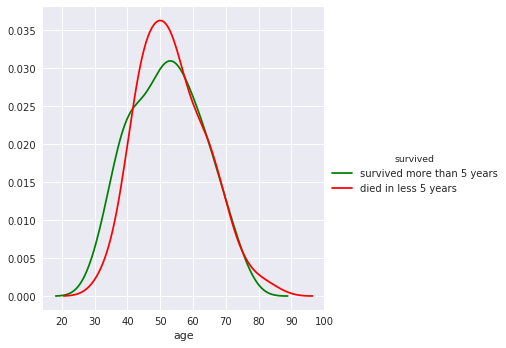

In [9]:
sns.FacetGrid(data=hbman, hue='survived', size=5, palette=['g','r'])  \
            .map(sns.kdeplot,'age') \
            .add_legend();
plt.show()
# there are more number of patients of age between 40 to 60 who died, than who survived.

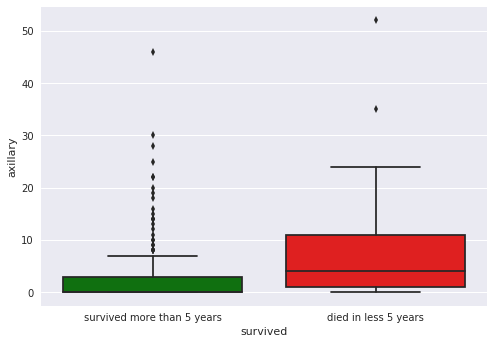

In [10]:
sns.boxplot(x='survived', y='axillary', data=hbman, palette=['g','r'])
plt.show()

# patients who had number of axillary nodes more than 10 did't survived more than 5 years after operation.